In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Law of Large Numbers

We can simulate a large number of values for X.

In [36]:
n = 1000000

In [37]:
np.random.seed(51)
die_1 = np.random.randint(1, 7, size = n)


In [38]:
np.random.seed(81)
die_2 = np.random.randint(1, 7, size = n)


In [39]:
X = die_1 + die_2

In [40]:
df = pd.DataFrame({'die_1' : die_1, 'die_2' : die_2, 'X' : X})

In [41]:
df.head(10)

,die_1,die_2,X
0,2,4,6
1,6,2,8
2,1,1,2
3,2,4,6
4,6,4,10
5,1,4,5
6,6,2,8
7,5,2,7
8,2,6,8
9,6,3,9


In [42]:
total_four = df[df['X'] == 4]
len(total_four)


83599

In [43]:
p = len(total_four) / len(df)
p
# n = 1000 olduğunda 0.104
# n = 10000 olduğunda 0.08207
# n = 1000000 olduğunda 0.083599


0.083599

In [44]:
# teorik frekans 
# n arttıkça göreceli frekans teorik frekansa yaklaşır

1 / 12 


0.08333333333333333

In [45]:
freq = df.X.value_counts()
freq


7     166815
6     138767
8     138540
5     110974
9     110934
4      83599
10     83337
11     55840
3      55805
12     27760
2      27629
Name: X, dtype: int64

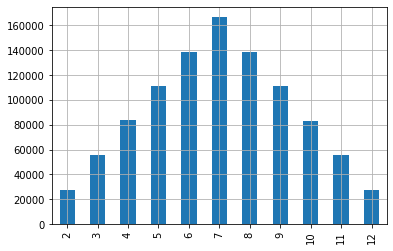

In [47]:
%matplotlib inline
freq.sort_index().plot(kind="bar", grid=True);


In [48]:
prob = df.X.value_counts() / n
prob


7     0.166815
6     0.138767
8     0.138540
5     0.110974
9     0.110934
4     0.083599
10    0.083337
11    0.055840
3     0.055805
12    0.027760
2     0.027629
Name: X, dtype: float64

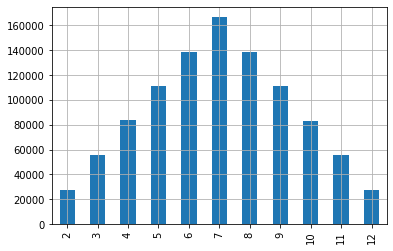

In [49]:
%matplotlib inline
freq.sort_index().plot(kind="bar", grid=True);


## Binomial Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 3.40**

The probability that a patient recovers from a stomach disease is 0.8. 

Suppose 20 people are known to have contracted this disease. 

What is the probability that

a. exactly 14 recover?

this is P(X=14)

In [51]:
n = 20
p = .8
x = 14

In [54]:
stats.binom.pmf(x, n, p)
# Hastaların iyileşme oranı yüzde 80 ise, 20 kişiden 14 kişinin iyileşme olasılığı nedir?
# Cevap : 0.10909970097304983

0.10909970097304983

In [57]:
stats.binom.mean(n, p)
# expected outcome

16.0

b. at least 10 recover?

this is P(X≥10)=P(10)+P(11)+P(12)+...+P(20)

In [58]:
x = 10

In [59]:
# cumulative distributions function
# stats.binom.cdf(x, n, p) 10 a kadar olan olasılıkların toplamı.
1 - stats.binom.cdf(x-1, n, p)

0.9994365863023398

c. at least 14 but not more than 18 recover?

this is P(14≤X≤18)=P(14)+P(15)+...+P(18)

In [60]:
x1 = 14
x2 = 18

In [61]:
stats.binom.cdf(x2,n,p) - stats.binom.cdf(x1-1,n,p)
# 14 - 18 arasındaki iyileşme olasılıkların toplamı: 18 dahil olan olasılıkdan 13 dahil olasılığı çıkararak bulduk.

0.844132196156189

In [62]:
stats.binom.pmf(14,n,p) + stats.binom.pmf(15,n,p) + stats.binom.pmf(16,n,p) + stats.binom.pmf(17,n,p) + stats.binom.pmf(18,n,p) 

0.8441321961561871

d. at most 16 recover?

this is P(X≤16)=1−P(X>16)=P(17)+P(18)+P(19)+P(20)

In [63]:
x = 16

In [65]:
stats.binom.cdf(x,n,p)

0.5885511380434305

In [66]:
1 - (0.2053641430080944 + 0.13690942867206304 + 0.05764607523034236 + 0.011529215046068481)

0.5885511380434316

e. Construct discrete probability distribution table and draw a graph

In [67]:
dist = []

for i in range(n+1):
    dist.append(stats.binom.pmf(i,n,p))
    print(str(i) + "\t" + str(stats.binom.pmf(i,n,p)))

0	1.048576000000001e-14
1	8.388607999999975e-13
2	3.187671040000001e-11
3	7.650410495999974e-10
4	1.3005697843199945e-08
5	1.6647293239295892e-07
6	1.664729323929588e-06
7	1.3317834591436803e-05
8	8.656592484433902e-05
9	0.000461684932503141
10	0.002031413703013826
11	0.007386958920050259
12	0.022160876760150803
13	0.0545498504865252
14	0.10909970097304983
15	0.17455952155687976
16	0.21819940194610007
17	0.2053641430080944
18	0.13690942867206304
19	0.05764607523034236
20	0.011529215046068481


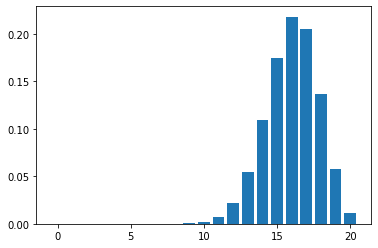

In [68]:
plt.bar(list(range(n+1)), dist)
plt.show;

## Poisson Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

Suppose that a random system of police patrol is devised so that a patrol officer may visit a given beat location Y = 0, 1, 2, 3, . . . times per half-hour period, with each location being visited an average of once per time period. 

Assume that Y possesses, approximately, a Poisson probability distribution. 

Calculate the probability that the patrol officer will miss a given location during a half-hour period. 

What is the probability that it will be visited once? 

Twice? 

At least once?

In [69]:
#For this example the time period is a half-hour, and the mean number of visits per half-hour interval is λ = 1. Then

mu = 1

P(Y = 0) = ?

In [70]:
stats.poisson.pmf(0, mu)

0.36787944117144233

P(Y = 1) = ?

In [71]:
stats.poisson.pmf(1, mu)

0.36787944117144233

P(Y = 2) = ?

In [72]:
stats.poisson.pmf(2, mu)

0.18393972058572114

P(Y ≥ 1) = ?

In [73]:
1 - stats.poisson.pmf(0, mu)

0.6321205588285577

In [74]:
1 - stats.poisson.cdf(0, mu)

0.6321205588285576

P(Y ≥ 3) = ?

In [75]:
1 - stats.poisson.cdf(2, mu)

0.08030139707139416

## Normal Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

In [34]:
mu = 
sigma = 
x = 

SyntaxError: invalid syntax (<ipython-input-34-f1d5a8964f2a>, line 1)

b. Suppose that students scoring in the top 10% of this distribution are to receive an A grade.
What is the minimum score a student must achieve to earn an A grade?

In [ ]:
q = 

c. What must be the cutoff point for passing the examination if the examiner wants only the
top 28.1% of all scores to be passing?

In [ ]:
q = 

d. Approximately what proportion of students have scores 5 or more points above the score
that cuts off the lowest 25%?

In [ ]:
q1 = 
x1 = 

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

## t Distribution
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

In [ ]:
dof = 
q = 